## Observations and Insights 

In [340]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset on "Mouse ID"
mouse_study_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")

# Display the data table for preview


mouse_study_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mouse_grouped = pd.DataFrame(mouse_study_df.groupby("Mouse ID"))
mouse_count = len(mouse_grouped)
mouse_count


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
id_timepoint = mouse_study_df.groupby(["Mouse ID", "Timepoint"]).count()
id_timepoint.loc[(id_timepoint["Drug Regimen"] > 1)]





Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     0                     2    2           2           2   
         5                     2    2           2           2   
         10                    2    2           2           2   
         15                    2    2           2           2   
         20                    2    2           2           2   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     0                           2                 2  
         5                           2                 2  
         10                          2                 2  
         15                          2                 2  
         20                          2                 2

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_df.loc[(mouse_study_df["Mouse ID"] == "g989")]



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# set the index to be Mouse ID
mouse_index_df = mouse_study_df.set_index("Mouse ID")
mouse_index_df = mouse_index_df.drop(labels=["g989"])
mouse_index_df





,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_clean_df = mouse_index_df.reset_index()

mouse_grouped_clean = pd.DataFrame(mouse_clean_df.groupby("Mouse ID"))
mouse_count_clean = len(mouse_grouped_clean)
print(mouse_count_clean)

mouse_clean_df




248


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [66]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#group dataframe by drug regimen
regimen_group = mouse_clean_df.groupby("Drug Regimen")

#calculate the var on the groupedby object
regimen_group_var = regimen_group.var()

#calculate the sem on the groupedby object
regimen_group_sem = regimen_group.sem()






#calculate and display summary statistics on the tumor volume column
summary_statistics = pd.DataFrame(regimen_group["Tumor Volume (mm3)"].describe())
summary_statistics["var"] = regimen_group_var["Tumor Volume (mm3)"]
summary_statistics["sem"] = regimen_group_sem["Tumor Volume (mm3)"]

#delete extra columns
del summary_statistics["count"]
del summary_statistics["min"]
del summary_statistics["25%"]
del summary_statistics["75%"]
del summary_statistics["max"]

#rename median column
summary_statistics = summary_statistics.rename(columns = {"50%": "median"})

#reorder columns
summary_statistics = summary_statistics[["mean", "median", "var", "std", "sem"]]




summary_statistics




,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

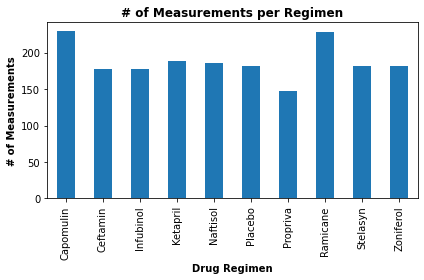

In [197]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
plot = regimen_measurements_df.plot(kind="bar", legend=False)
plot.set_xlabel("Drug Regimen", fontweight="bold")
plot.set_ylabel("# of Measurements", fontweight="bold")
plot.set_title("# of Measurements per Regimen", fontweight="bold")
plt.tight_layout()


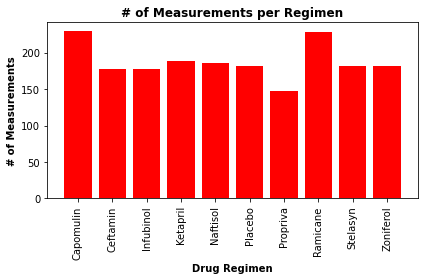

In [206]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimen_measurements = mouse_clean_df.groupby("Drug Regimen").count()["Mouse ID"]
regimen_measurements_df = pd.DataFrame(regimen_measurements)


plt.bar(regimen_measurements_df.index, regimen_measurements_df["Mouse ID"], color="r")
plt.xticks(regimen_measurements_df.index, rotation=90)
plt.title("# of Measurements per Regimen", fontweight="bold")
plt.xlabel("Drug Regimen", fontweight="bold")
plt.ylabel("# of Measurements", fontweight="bold")
plt.tight_layout()
plt.show()


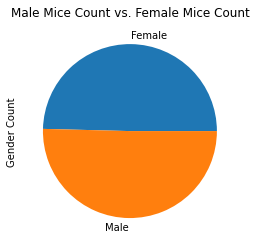

In [218]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#group the original dataframe by mouse ID and sex
sex_count = mouse_clean_df.groupby(["Mouse ID", "Sex"])

#perform the size function on the groupby object
sex_count_df = pd.DataFrame(sex_count.size())
sex_count_df

#get a count on each mouse ID grouped by sex
mouse_gender = pd.DataFrame(sex_count_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Gender Count"]



#generate pie plot showing female vs male using pandas
pieplot = mouse_gender.plot(kind="pie", y="Gender Count", title="Male Mice Count vs. Female Mice Count", legend=False)


plt.show()







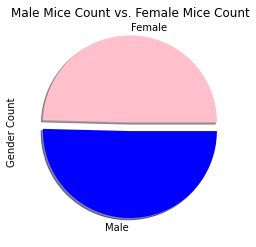

In [219]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#pull out the male and female mouse count from the dataframe
female_count = mouse_gender.iloc[0, 0]
male_count = mouse_gender.iloc[1, 0]

#put male and female count into a list and assign labels
sizes = [female_count, male_count]
labels = ["Female", "Male"]
colors = ["Pink", "Blue"]
explode = (.1, 0)

#create pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True)
plt.title("Male Mice Count vs. Female Mice Count")
plt.ylabel("Gender Count")

plt.show()


## Quartiles, Outliers and Boxplots

In [254]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor = mouse_clean_df.groupby(mouse_clean_df["Mouse ID"])
final_tumor = final_tumor.max()["Timepoint"]



# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_tumor_df = pd.merge(mouse_clean_df, final_tumor, on="Mouse ID", how="left")
merged_tumor_df = merged_tumor_df.rename(columns={"Timepoint_y": "Max Timepoint", "Timepoint_x": "Timepoint"})
merged_tumor_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [305]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


#loop through each treatment and collect data
for treatment in treatments:
    #find only the treatments listed in the list above
    treatments_df = merged_tumor_df.loc[merged_tumor_df["Drug Regimen"] == treatment]
    
    #find only the tumor volume that corresponds to the final timepoint
    final_volume_df = treatments_df.loc[treatments_df["Timepoint"] == treatments_df["Max Timepoint"]]
    
    #create series with all final volumes for treatments listed above and add to tumor volume list
    volumes = final_volume_df["Tumor Volume (mm3)"]
    tumor_vol_data.append(volumes)  


    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = volumes.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    median = quartiles[.5]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"The lower quartile of {treatment} is {lowerq}.")
    print(f"The upper quartile of {treatment} is {upperq}.")
    print(f"The median of {treatment} is {median}.")
    print(f"The interquartile range of {treatment} is {iqr}.")
    print(f"Potential outliers for the {treatment} data set would be tumor volumes less than {lower_bound} or greater than {upper_bound}")
    
    
    # Determine outliers using upper and lower bounds
    outliers = volumes.loc[(final_volume_df["Tumor Volume (mm3)"] < lower_bound) | 
                                           (final_volume_df["Tumor Volume (mm3)"] > upper_bound)]
    
    #print outliers if any identified
    if (outliers.empty) == False:
        for outlier in outliers:
            print(f"Outliers Identified: {outlier}")      
    print("--------------------------------------------------")
    
    
   
    

The lower quartile of Capomulin is 32.37735684.
The upper quartile of Capomulin is 40.1592203.
The median of Capomulin is 38.125164399999996.
The interquartile range of Capomulin is 7.781863460000004.
Potential outliers for the Capomulin data set would be tumor volumes less than 20.70456164999999 or greater than 51.83201549
--------------------------------------------------
The lower quartile of Ramicane is 31.56046955.
The upper quartile of Ramicane is 40.65900627.
The median of Ramicane is 36.56165229.
The interquartile range of Ramicane is 9.098536719999998.
Potential outliers for the Ramicane data set would be tumor volumes less than 17.912664470000003 or greater than 54.30681135
--------------------------------------------------
The lower quartile of Infubinol is 54.04860769.
The upper quartile of Infubinol is 65.52574285.
The median of Infubinol is 60.16518046.
The interquartile range of Infubinol is 11.477135160000003.
Potential outliers for the Infubinol data set would be tumor

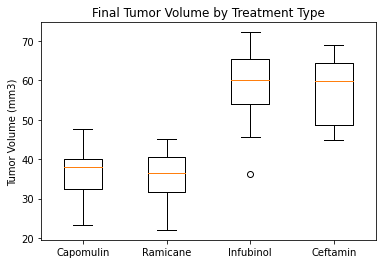

In [308]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume by Treatment Type")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(tumor_vol_data, labels = treatments)
plt.show()

## Line and Scatter Plots

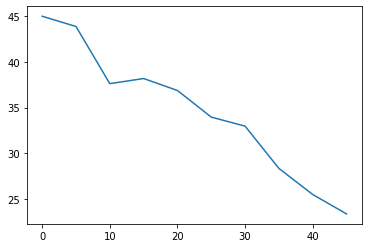

In [318]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#create a df with just the Capomulin regimen
capomulin_df = mouse_clean_df.loc[mouse_clean_df["Drug Regimen"] == "Capomulin"]

#further narrow the dataframe to a specific mouse ID
capomulin_s185_df = mouse_clean_df.loc[mouse_clean_df["Mouse ID"] == "s185"]

#assign x and y values for plot
x_values = capomulin_s185_df["Timepoint"]
y_values = capomulin_s185_df["Tumor Volume (mm3)"]

plt.plot(x_values, y_values)
plt.show()


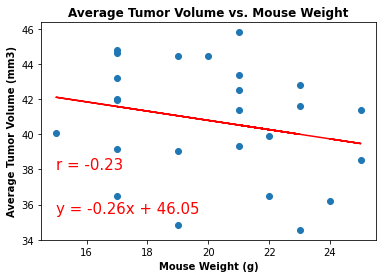

In [362]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#groupby mouse ID and calculate the average tumor volume
capomulin_df_grouped = capomulin_df.groupby(capomulin_df["Mouse ID"])
avg_tum_vol = capomulin_df_grouped.mean()["Tumor Volume (mm3)"]
avg_tum_vol



#clean the dataframe to remove duplicate mouse ID's
bool_series = capomulin_df["Mouse ID"].duplicated(keep="first")

#return only one Mouse ID and remove the duplicates
single_mouse = capomulin_df[~bool_series]

#return only the mouse weight column
mouse_weight = single_mouse["Weight (g)"]

#plot the scatter
plt.scatter(mouse_weight, avg_tum_vol)
plt.title("Average Tumor Volume vs. Mouse Weight", fontweight='bold')
plt.xlabel("Mouse Weight (g)", fontweight='bold')
plt.ylabel("Average Tumor Volume (mm3)", fontweight='bold')


# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


#calculate the linear regression model and correlation coefficient using linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_tum_vol)
regress_values = (mouse_weight * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(mouse_weight, regress_values, "r-")
plt.annotate(line_eq,(15,35.5),fontsize=15,color="red")

rvalue = round(rvalue, 2)
plt.annotate(f"r = {rvalue}",(15,38),fontsize=15,color="red")





plt.show()


## Correlation and Regression

In [345]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#see cell above


